# Fingerprint Testing

The purpose of this notebook is to test and calculate the ROC of the **train set**, just to figure out the best way to do so. It will follow a notebook with a proper test set.

In [1]:
import re

import numpy as np
import pandas as pd

In [2]:
string_df = pd.read_csv("../../data/interim/string_df.csv")

In [3]:
string_df

,label,concatenated
0,GooglePixel3A_L,0000000000000100000000100000010000001011000101...
1,GooglePixel3A_L,0000000000000100000000100000010000001011000101...
2,GooglePixel3A_L,0000000000000100000000100000010000001011000101...
3,GooglePixel3A_L,0000000000000100000000100000010000001011000101...
4,GooglePixel3A_L,0000000000000100000000100000010000001011000101...
...,...,...
951,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...
952,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...
953,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...
954,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...


In [4]:
balanced_pairs_df = pd.read_csv("../../data/interim/balanced_pairs_df.csv", index_col=0)
balanced_pairs_df.reset_index(drop=True, inplace=True)

In [5]:
balanced_pairs_df

,Item 1,Item 2,Equality,device1,device2
0,767,858,1,XiaomiRedmi5_J,XiaomiRedmi5_J
1,767,858,1,XiaomiRedmi5_J,XiaomiRedmi5_J
2,672,789,1,XiaomiRedmi5_J,XiaomiRedmi5_J
3,672,789,1,XiaomiRedmi5_J,XiaomiRedmi5_J
4,748,761,1,XiaomiRedmi5_J,XiaomiRedmi5_J
...,...,...,...,...,...
4995,326,330,-1,iPhone11_M,iPhoneXSMax_M
4996,33,442,-1,iPhone12_W,iPhone11_M
4997,120,832,-1,iPhone11_M,XiaomiRedmiNote7_S
4998,274,774,-1,iPhone11_M,XiaomiRedmi5_J


In [6]:
best_filters = [
    "0[2176] 🀆🀆🀆🀆🀫🀫🀫🀫 0[104]",
    "0[1944] 🀫🀫🀫🀫🀫🀫🀫🀫 0[336]",
    "0[0] 🀆🀆🀆🀆🀫🀫🀫🀫 0[2280]",
    "0[1720] 🀫🀫🀫🀫🀆🀆🀆🀆 0[560]",
    "0[1608] 🀆🀆🀆🀆🀫🀫🀫🀫 0[672]",
    "0[1600] 🀫🀫🀫🀫🀫🀫🀫🀫 0[680]",
    "0[1600] 🀫🀫🀫🀫🀆🀆🀆🀆 0[680]",
    "0[1600] 🀆🀆🀆🀆🀫🀫🀫🀫 0[680]",
    "0[1256] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1024]",
    "0[1720] 🀆🀆🀆🀆🀫🀫🀫🀫 0[560]",
    "0[1480] 🀫🀫🀫🀫🀆🀆🀆🀆 0[800]",
    "0[912] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1368]",
    "0[1136] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1144]",
    "0[1368] 🀆🀆🀆🀆🀫🀫🀫🀫 0[912]",
    "0[680] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1600]",
    "0[1136] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1144]",
    "0[1248] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1032]",
    "0[224] 🀫🀫🀫🀫🀫🀫🀫🀫 0[2056]",
    "0[1592] 🀫🀫🀫🀫🀆🀆🀆🀆 0[688]",
    "0[560] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1720]",
    "0[2064] 🀫🀫🀫🀫🀆🀆🀆🀆 0[216]",
    "0[1480] 🀫🀫🀫🀫🀫🀫🀫🀫 0[800]",
    "0[2064] 🀆🀆🀆🀆🀫🀫🀫🀫 0[216]",
    "0[2176] 🀫🀫🀫🀫🀆🀆🀆🀆 0[104]",
    "0[1608] 🀫🀫🀫🀫🀫🀫🀫🀫 0[672]",
    "0[1832] 🀫🀫🀫🀫🀫🀫🀫🀫 0[448]",
    "0[1720] 🀫🀫🀫🀫🀫🀫🀫🀫 0[560]",
    "0[1472] 🀫🀫🀫🀫🀫🀫🀫🀫 0[808]",
    "0[1128] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1152]",
    "0[1832] 🀫🀫🀫🀫🀆🀆🀆🀆 0[448]",
    "0[1584] 🀫🀫🀫🀫🀫🀫🀫🀫 0[696]",
    "0[1240] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1040]",
    "0[1832] 🀆🀆🀆🀆🀫🀫🀫🀫 0[448]",
    "0[1120] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1160]",
    "0[672] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1608]",
    "0[1112] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1168]",
    "0[664] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1616]",
    "0[1112] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1168]",
    "0[1112] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1168]",
    "0[2176] 🀫🀫🀫🀫🀫🀫🀫🀫 0[104]",
    "0[2168] 🀫🀫🀫🀫🀫🀫🀫🀫 0[112]",
    "0[2168] 🀫🀫🀫🀫🀆🀆🀆🀆 0[112]",
    "0[2168] 🀆🀆🀆🀆🀫🀫🀫🀫 0[112]",
    "0[1824] 🀫🀫🀫🀫🀫🀫🀫🀫 0[456]",
    "0[2048] 🀫🀫🀫🀫🀫🀫🀫🀫 0[232]",
    "0[2048] 🀫🀫🀫🀫🀆🀆🀆🀆 0[232]",
    "0[2160] 🀫🀫🀫🀫🀫🀫🀫🀫 0[120]",
    "0[1936] 🀆🀆🀆🀆🀫🀫🀫🀫 0[344]",
    "0[1456] 🀫🀫🀫🀫🀫🀫🀫🀫 0[824]",
    "0[1456] 🀫🀫🀫🀫🀆🀆🀆🀆 0[824]",
    "0[1232] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1048]",
    "0[1224] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1056]",
    "0[1096] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1184]",
    "0[1096] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1184]",
    "0[1096] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1184]",
    "0[872] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1408]",
    "0[768] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1512]",
    "0[1696] 🀫🀫🀫🀫🀫🀫🀫🀫 0[584]",
    "0[872] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1408]",
    "0[2184] 🀆🀆🀆🀆🀫🀫🀫🀫 0[96]",
    "0[2160] 🀫🀫🀫🀫🀆🀆🀆🀆 0[120]",
    "0[2040] 🀫🀫🀫🀫🀫🀫🀫🀫 0[240]",
    "0[2160] 🀆🀆🀆🀆🀫🀫🀫🀫 0[120]",
    "0[1704] 🀆🀆🀆🀆🀫🀫🀫🀫 0[576]",
    "0[1576] 🀆🀆🀆🀆🀫🀫🀫🀫 0[704]",
    "0[1928] 🀫🀫🀫🀫🀆🀆🀆🀆 0[352]",
    "0[1928] 🀆🀆🀆🀆🀫🀫🀫🀫 0[352]",
    "0[1808] 🀫🀫🀫🀫🀆🀆🀆🀆 0[472]",
    "0[2152] 🀫🀫🀫🀫🀫🀫🀫🀫 0[128]",
    "0[984] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1296]",
    "0[872] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1408]",
    "0[1688] 🀆🀆🀆🀆🀫🀫🀫🀫 0[592]",
    "0[976] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1304]",
    "0[752] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1528]",
    "0[536] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1744]",
    "0[976] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1304]",
    "0[976] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1304]",
    "0[1336] 🀆🀆🀆🀆🀫🀫🀫🀫 0[944]",
    "0[1680] 🀫🀫🀫🀫🀫🀫🀫🀫 0[600]",
    "0[2184] 🀫🀫🀫🀫🀆🀆🀆🀆 0[96]",
    "0[2152] 🀫🀫🀫🀫🀆🀆🀆🀆 0[128]",
    "0[2152] 🀆🀆🀆🀆🀫🀫🀫🀫 0[128]",
    "0[2032] 🀫🀫🀫🀫🀆🀆🀆🀆 0[248]",
    "0[1688] 🀫🀫🀫🀫🀆🀆🀆🀆 0[592]",
    "0[2144] 🀫🀫🀫🀫🀫🀫🀫🀫 0[136]",
    "0[1680] 🀆🀆🀆🀆🀫🀫🀫🀫 0[600]",
    "0[2024] 🀫🀫🀫🀫🀫🀫🀫🀫 0[256]",
    "0[1328] 🀫🀫🀫🀫🀆🀆🀆🀆 0[952]",
    "0[1672] 🀫🀫🀫🀫🀆🀆🀆🀆 0[608]",
    "0[1080] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1200]",
    "0[1432] 🀫🀫🀫🀫🀆🀆🀆🀆 0[848]",
    "0[744] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1536]",
    "0[744] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1536]",
    "0[736] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1544]",
    "0[736] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1544]",
    "0[2144] 🀫🀫🀫🀫🀆🀆🀆🀆 0[136]",
    "0[1200] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1080]",
    "0[616] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1664]",
    "0[1320] 🀆🀆🀆🀆🀫🀫🀫🀫 0[960]",
    "0[2184] 🀫🀫🀫🀫🀫🀫🀫🀫 0[96]",
    "0[2144] 🀆🀆🀆🀆🀫🀫🀫🀫 0[136]",
    "0[2024] 🀆🀆🀆🀆🀫🀫🀫🀫 0[256]",
    "0[1800] 🀆🀆🀆🀆🀫🀫🀫🀫 0[480]",
    "0[1672] 🀆🀆🀆🀆🀫🀫🀫🀫 0[608]",
    "0[1544] 🀫🀫🀫🀫🀫🀫🀫🀫 0[736]",
    "0[1912] 🀆🀆🀆🀆🀫🀫🀫🀫 0[368]",
    "0[1424] 🀫🀫🀫🀫🀫🀫🀫🀫 0[856]",
    "0[2136] 🀫🀫🀫🀫🀫🀫🀫🀫 0[144]",
    "0[1536] 🀫🀫🀫🀫🀫🀫🀫🀫 0[744]",
    "0[1192] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1088]",
    "0[1312] 🀆🀆🀆🀆🀫🀫🀫🀫 0[968]",
    "0[1536] 🀫🀫🀫🀫🀆🀆🀆🀆 0[744]",
    "0[1304] 🀫🀫🀫🀫🀆🀆🀆🀆 0[976]",
    "0[1056] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1224]",
    "0[1416] 🀫🀫🀫🀫🀆🀆🀆🀆 0[864]",
    "0[608] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1672]",
    "0[304] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1976]",
    "0[400] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1880]",
    "0[0] 🀫🀫🀫🀫🀆🀆🀆🀆 0[2280]",
    "0[2192] 🀆🀆🀆🀆🀫🀫🀫🀫 0[88]",
    "0[2016] 🀫🀫🀫🀫🀫🀫🀫🀫 0[264]",
    "0[2136] 🀫🀫🀫🀫🀆🀆🀆🀆 0[144]",
    "0[1904] 🀫🀫🀫🀫🀆🀆🀆🀆 0[376]",
    "0[1664] 🀫🀫🀫🀫🀆🀆🀆🀆 0[616]",
    "0[1664] 🀆🀆🀆🀆🀫🀫🀫🀫 0[616]",
    "0[1416] 🀫🀫🀫🀫🀫🀫🀫🀫 0[864]",
    "0[1656] 🀫🀫🀫🀫🀫🀫🀫🀫 0[624]",
    "0[2016] 🀆🀆🀆🀆🀫🀫🀫🀫 0[264]",
    "0[1784] 🀫🀫🀫🀫🀫🀫🀫🀫 0[496]",
    "0[1408] 🀆🀆🀆🀆🀫🀫🀫🀫 0[872]",
    "0[1648] 🀫🀫🀫🀫🀫🀫🀫🀫 0[632]",
    "0[1648] 🀫🀫🀫🀫🀆🀆🀆🀆 0[632]",
    "0[1168] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1112]",
    "0[824] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1456]",
    "0[2136] 🀆🀆🀆🀆🀫🀫🀫🀫 0[144]",
    "0[1168] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1112]",
    "0[1160] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1120]",
    "0[2128] 🀫🀫🀫🀫🀫🀫🀫🀫 0[152]",
    "0[1280] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1000]",
    "0[488] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1792]",
    "0[2008] 🀫🀫🀫🀫🀫🀫🀫🀫 0[272]",
    "0[2192] 🀫🀫🀫🀫🀆🀆🀆🀆 0[88]",
    "0[2128] 🀫🀫🀫🀫🀆🀆🀆🀆 0[152]",
    "0[1784] 🀆🀆🀆🀆🀫🀫🀫🀫 0[496]",
    "0[1520] 🀫🀫🀫🀫🀆🀆🀆🀆 0[760]",
    "0[1896] 🀆🀆🀆🀆🀫🀫🀫🀫 0[384]",
    "0[1640] 🀫🀫🀫🀫🀆🀆🀆🀆 0[640]",
    "0[2000] 🀫🀫🀫🀫🀫🀫🀫🀫 0[280]",
    "0[1776] 🀆🀆🀆🀆🀫🀫🀫🀫 0[504]",
    "0[1272] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1008]",
    "0[1632] 🀫🀫🀫🀫🀆🀆🀆🀆 0[648]",
    "0[1888] 🀫🀫🀫🀫🀆🀆🀆🀆 0[392]",
    "0[1024] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1256]",
    "0[808] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1472]",
    "0[912] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1368]",
    "0[1016] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1264]",
    "0[904] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1376]",
    "0[1384] 🀆🀆🀆🀆🀫🀫🀫🀫 0[896]",
    "0[480] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1800]",
    "0[2192] 🀫🀫🀫🀫🀫🀫🀫🀫 0[88]",
    "0[2128] 🀆🀆🀆🀆🀫🀫🀫🀫 0[152]",
    "0[1888] 🀫🀫🀫🀫🀫🀫🀫🀫 0[392]",
    "0[2000] 🀫🀫🀫🀫🀆🀆🀆🀆 0[280]",
    "0[1632] 🀆🀆🀆🀆🀫🀫🀫🀫 0[648]",
    "0[1880] 🀫🀫🀫🀫🀫🀫🀫🀫 0[400]",
    "0[1504] 🀆🀆🀆🀆🀫🀫🀫🀫 0[776]",
    "0[1768] 🀆🀆🀆🀆🀫🀫🀫🀫 0[512]",
    "0[1376] 🀫🀫🀫🀫🀆🀆🀆🀆 0[904]",
    "0[1624] 🀆🀆🀆🀆🀫🀫🀫🀫 0[656]",
    "0[1496] 🀆🀆🀆🀆🀫🀫🀫🀫 0[784]",
    "0[1008] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1272]",
    "0[2000] 🀆🀆🀆🀆🀫🀫🀫🀫 0[280]",
    "0[688] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1592]",
    "0[1760] 🀫🀫🀫🀫🀆🀆🀆🀆 0[520]",
    "0[1992] 🀫🀫🀫🀫🀫🀫🀫🀫 0[288]",
    "0[1120] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1160]",
    "0[1120] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1160]",
    "0[1360] 🀆🀆🀆🀆🀫🀫🀫🀫 0[920]",
    "0[0] 🀫🀫🀫🀫🀫🀫🀫🀫 0[2280]",
    "0[2200] 🀆🀆🀆🀆🀫🀫🀫🀫 0[80]",
    "0[2120] 🀫🀫🀫🀫🀫🀫🀫🀫 0[160]",
    "0[1880] 🀆🀆🀆🀆🀫🀫🀫🀫 0[400]",
    "0[1872] 🀫🀫🀫🀫🀫🀫🀫🀫 0[408]",
    "0[2120] 🀫🀫🀫🀫🀆🀆🀆🀆 0[160]",
    "0[1752] 🀫🀫🀫🀫🀆🀆🀆🀆 0[528]",
    "0[1592] 🀫🀫🀫🀫🀫🀫🀫🀫 0[688]",
    "0[1472] 🀫🀫🀫🀫🀆🀆🀆🀆 0[808]",
    "0[1992] 🀆🀆🀆🀆🀫🀫🀫🀫 0[288]",
    "0[992] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1288]",
    "0[1584] 🀫🀫🀫🀫🀆🀆🀆🀆 0[696]",
    "0[784] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1496]",
    "0[1104] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1176]",
    "0[1464] 🀫🀫🀫🀫🀆🀆🀆🀆 0[816]",
    "0[568] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1712]",
    "0[2120] 🀆🀆🀆🀆🀫🀫🀫🀫 0[160]",
    "0[280] 🀫🀫🀫🀫🀆🀆🀆🀆 0[2000]",
    "0[368] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1912]",
    "0[184] 🀫🀫🀫🀫🀆🀆🀆🀆 0[2096]",
    "0[96] 🀆🀆🀆🀆🀫🀫🀫🀫 0[2184]",
    "0[2200] 🀫🀫🀫🀫🀆🀆🀆🀆 0[80]",
    "0[1984] 🀫🀫🀫🀫🀫🀫🀫🀫 0[296]",
    "0[1984] 🀫🀫🀫🀫🀆🀆🀆🀆 0[296]",
    "0[1864] 🀫🀫🀫🀫🀆🀆🀆🀆 0[416]",
    "0[1584] 🀆🀆🀆🀆🀫🀫🀫🀫 0[696]",
    "0[1576] 🀫🀫🀫🀫🀫🀫🀫🀫 0[704]",
    "0[1576] 🀫🀫🀫🀫🀆🀆🀆🀆 0[704]",
    "0[1344] 🀆🀆🀆🀆🀫🀫🀫🀫 0[936]",
    "0[1088] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1192]",
    "0[984] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1296]",
    "0[2112] 🀫🀫🀫🀫🀫🀫🀫🀫 0[168]",
    "0[1080] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1200]",
    "0[2112] 🀫🀫🀫🀫🀆🀆🀆🀆 0[168]",
    "0[1568] 🀆🀆🀆🀆🀫🀫🀫🀫 0[712]",
    "0[1856] 🀫🀫🀫🀫🀆🀆🀆🀆 0[424]",
    "0[464] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1816]",
    "0[368] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1912]",
    "0[192] 🀆🀆🀆🀆🀫🀫🀫🀫 0[2088]",
    "0[760] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1520]",
    "0[2112] 🀆🀆🀆🀆🀫🀫🀫🀫 0[168]",
    "0[2200] 🀫🀫🀫🀫🀫🀫🀫🀫 0[80]",
    "0[1976] 🀫🀫🀫🀫🀆🀆🀆🀆 0[304]",
    "0[2104] 🀫🀫🀫🀫🀫🀫🀫🀫 0[176]",
    "0[1848] 🀫🀫🀫🀫🀫🀫🀫🀫 0[432]",
    "0[1968] 🀫🀫🀫🀫🀫🀫🀫🀫 0[312]",
    "0[1728] 🀫🀫🀫🀫🀫🀫🀫🀫 0[552]",
    "0[1728] 🀫🀫🀫🀫🀆🀆🀆🀆 0[552]",
    "0[1208] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1072]",
    "0[1208] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1072]",
    "0[1968] 🀫🀫🀫🀫🀆🀆🀆🀆 0[312]",
    "0[1432] 🀆🀆🀆🀆🀫🀫🀫🀫 0[848]",
    "0[856] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1424]",
    "0[848] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1432]",
    "0[848] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1432]",
    "0[1200] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1080]",
    "0[1424] 🀫🀫🀫🀫🀆🀆🀆🀆 0[856]",
    "0[360] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1920]",
    "0[640] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1640]",
    "0[176] 🀫🀫🀫🀫🀆🀆🀆🀆 0[2104]",
    "0[1192] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1088]",
    "0[2208] 🀆🀆🀆🀆🀫🀫🀫🀫 0[72]",
    "0[1976] 🀆🀆🀆🀆🀫🀫🀫🀫 0[304]",
    "0[1968] 🀆🀆🀆🀆🀫🀫🀫🀫 0[312]",
    "0[1840] 🀫🀫🀫🀫🀫🀫🀫🀫 0[440]",
    "0[1840] 🀫🀫🀫🀫🀆🀆🀆🀆 0[440]",
    "0[1960] 🀫🀫🀫🀫🀫🀫🀫🀫 0[320]",
    "0[1712] 🀆🀆🀆🀆🀫🀫🀫🀫 0[568]",
    "0[1192] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1088]",
    "0[1304] 🀫🀫🀫🀫🀫🀫🀫🀫 0[976]",
    "0[1184] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1096]",
    "0[1184] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1096]",
    "0[1704] 🀫🀫🀫🀫🀫🀫🀫🀫 0[576]",
    "0[1824] 🀫🀫🀫🀫🀆🀆🀆🀆 0[456]",
    "0[1296] 🀫🀫🀫🀫🀆🀆🀆🀆 0[984]",
    "0[1528] 🀫🀫🀫🀫🀫🀫🀫🀫 0[752]",
    "0[824] 🀫🀫🀫🀫🀆🀆🀆🀆 0[1456]",
    "0[720] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1560]",
]

In [7]:
best_thresholds = 8 * np.ones(
    len(best_filters)
)  # 8 is the threshold shared among the selected filters

## Functions

In [8]:
def convert_string_to_array(numeric_string: str) -> np.ndarray:
    # Extract numbers from the square brackets
    numbers = list(map(int, re.findall(r"\[([0-9]+)\]", numeric_string)))

    # Extract symbols between the square brackets, strip leading/trailing whitespace
    symbols = re.search(r"\](.*?)\[", numeric_string).group(1).strip()

    # Replace symbols
    symbol_map = {"🀆": -1, "🀫": 1}
    converted_symbols = [symbol_map[char] for char in symbols if char in symbol_map]

    # Construct the final array
    prefix_zeros = [0] * numbers[0]
    suffix_zeros = [0] * numbers[1]
    final_array = np.array(prefix_zeros + converted_symbols + suffix_zeros)

    return final_array

In [9]:
def generate_fingerprint(
    probe_burst: str, selected_filters: list, selected_thresholds: list
) -> list:
    probe_burst = np.array(list(probe_burst)).astype(int)

    selected_filter_arrays = []

    for selected_filter in selected_filters:
        selected_filter_array = convert_string_to_array(selected_filter)
        selected_filter_arrays.append(selected_filter_array)

    sum_array = []
    for selected_filter_array in selected_filter_arrays:
        sum_array.append(np.sum(np.multiply(probe_burst, selected_filter_array)))

    return sum_array

# Test filter only

Just to understand if the filters can discriminate between different probe burst, i will just filter each probe of the train set (without considering pairs and without using the thresholds). I will then proceed by grouping by filtered array.

In [10]:
string_df.iloc[0, 1]

'000000000000010000000010000001000000101100010110000000000000000000000000000000000000100000001100000100100001100000100100001100000100100001100000011011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111000000000101000011110010000010000000000000100111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [11]:
fingerprints = []
for string in string_df["concatenated"]:
    fingerprint = generate_fingerprint(string, best_filters, best_thresholds)
    fingerprints.append(fingerprint)

In [12]:
string_df["fingerprint"] = fingerprints

In [13]:
string_df

,label,concatenated,fingerprint
0,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,..."
2,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,..."
4,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
951,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
952,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
953,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
954,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,..."


In [14]:
string_df["fingerprint"] = string_df["fingerprint"].apply(
    lambda x: "".join(map(str, x))
)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [16]:
string_df["fingerprint_label"] = label_encoder.fit_transform(string_df["fingerprint"])

In [17]:
string_df["fingerprint_label"].nunique()

15

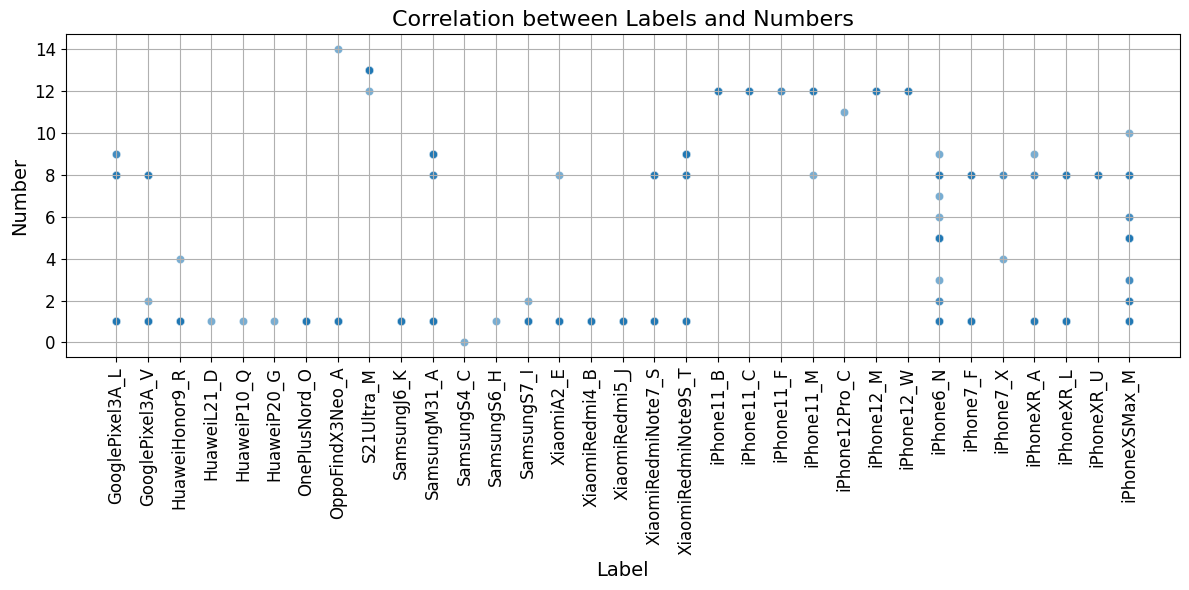

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation between labels and numbers
plt.figure(figsize=(12, 6))
sns.scatterplot(x="label", y="fingerprint_label", data=string_df, alpha=0.6)
plt.title("Correlation between Labels and Numbers", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Number", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
string_df[string_df["label"] == "iPhone6_N"]

,label,concatenated,fingerprint,fingerprint_label
758,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
759,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
760,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
761,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000-10000010001-1100000,1
762,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000-20000020003-3200000,5
763,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
764,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000-20000020003-3200000,5
765,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000-20000020001-1200000,3
766,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000-20000020003-3200000,5
767,iPhone6_N,0000000000000100000000100000010000001011000101...,000000000-20000020003-3200000,5


## ROC

Per calcolare la ROC bisogna farlo sul dataset delle coppie, calcolare la $h$ come durante il training e poi utilizzare un threhsold $\tau$ per adatare la curva.

In [20]:
balanced_pairs_df

,Item 1,Item 2,Equality,device1,device2
0,767,858,1,XiaomiRedmi5_J,XiaomiRedmi5_J
1,767,858,1,XiaomiRedmi5_J,XiaomiRedmi5_J
2,672,789,1,XiaomiRedmi5_J,XiaomiRedmi5_J
3,672,789,1,XiaomiRedmi5_J,XiaomiRedmi5_J
4,748,761,1,XiaomiRedmi5_J,XiaomiRedmi5_J
...,...,...,...,...,...
4995,326,330,-1,iPhone11_M,iPhoneXSMax_M
4996,33,442,-1,iPhone12_W,iPhone11_M
4997,120,832,-1,iPhone11_M,XiaomiRedmiNote7_S
4998,274,774,-1,iPhone11_M,XiaomiRedmi5_J


In [21]:
def convertColumntoArray(df: pd.DataFrame, column_name: str) -> np.array:
    return np.array([list(bstr) for bstr in df[column_name]])

In [22]:
def generateStringPairDf(pairs_df: pd.DataFrame, dataset: pd.DataFrame) -> pd.DataFrame:
    # Convert the Probes column to a numpy array
    dataset_array = convertColumntoArray(dataset, "concatenated")

    return_df = pd.DataFrame()

    # Import the Probes into the pairs_df dataframe
    return_df["Item 1"] = pairs_df["Item 1"].apply(lambda index: dataset_array[index])
    return_df["Item 2"] = pairs_df["Item 2"].apply(lambda index: dataset_array[index])
    return_df["Equality"] = pairs_df["Equality"]

    return return_df

In [23]:
string_df

,label,concatenated,fingerprint,fingerprint_label
0,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
1,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,000000000-10000010001-1100000,1
2,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
3,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,000000000-10000010001-1100000,1
4,GooglePixel3A_L,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
...,...,...,...,...
951,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
952,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
953,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...,000000000000000000000000000,8
954,iPhoneXSMax_M,0000000000000100000000100000010000001011000101...,000000000-10000010001-1100000,1


In [24]:
matrix_df = generateStringPairDf(balanced_pairs_df, string_df)

In [25]:
matrix_df

,Item 1,Item 2,Equality
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1
...,...,...,...
4995,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",-1
4996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1
4997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1
4998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1


In [26]:
def hamming_distance(arr1, arr2):
    # Ensure the arrays are of the same length
    if len(arr1) != len(arr2):
        raise ValueError("Arrays must be of the same length")

    # Calculate the Hamming distance
    distance = 0
    for a, b in zip(arr1, arr2):
        if a != b:
            distance += 1

    return distance

In [27]:
def filter_parser(input_string: str) -> list:
    # Split the string into its parts
    parts = input_string.split()

    # Initialize the final array
    result = []

    # Process each part
    for part in parts:
        if part.startswith("0["):
            # Extract the number inside the brackets
            count = int(part[2:-1])
            # Append the corresponding number of zeros to the result
            result.extend([0] * count)
        else:
            # Translate the tiles to their respective values
            for char in part:
                if char == "🀆":
                    result.append(-1)
                elif char == "🀫":
                    result.append(1)

    return result

In [28]:
fingerprint_1 = []
fingerprint_2 = []
tau = 8
ground_truth = matrix_df.iloc[0, 2].astype(int)

In [29]:
for best_filter in best_filters:
    fingerprint_1.append(
        sum(matrix_df.iloc[0, 0].astype(int) * filter_parser(best_filter))
        - best_thresholds[0]
    )
    fingerprint_2.append(
        sum(matrix_df.iloc[0, 1].astype(int) * filter_parser(best_filter))
        - best_thresholds[0]
    )

In [30]:
if hamming_distance(fingerprint_1, fingerprint_2) < tau:
    prediction = 1
else:
    prediction = -1

In [31]:
prediction

1

In [32]:
ground_truth

1

In [33]:
for i, row in matrix_df.iterrows():
    fingerprint_1 = []
    fingerprint_2 = []
    ground_truth = row["Equality"]

    for best_filter, best_threshold in zip(best_filters, best_thresholds):
        fingerprint_1.append(
            sum(row["Item 1"].astype(int) * filter_parser(best_filter)) - best_threshold
        )
        fingerprint_2.append(
            sum(row["Item 2"].astype(int) * filter_parser(best_filter)) - best_threshold
        )

    if hamming_distance(fingerprint_1, fingerprint_2) < tau:
        prediction = 1
    else:
        prediction = -1

    matrix_df.at[i, "prediction"] = prediction

In [34]:
matrix_df

,Item 1,Item 2,Equality,prediction
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1,1.0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1,1.0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1,1.0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1,1.0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1,1.0
...,...,...,...,...
4995,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",-1,1.0
4996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1,1.0
4997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1,1.0
4998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1,1.0


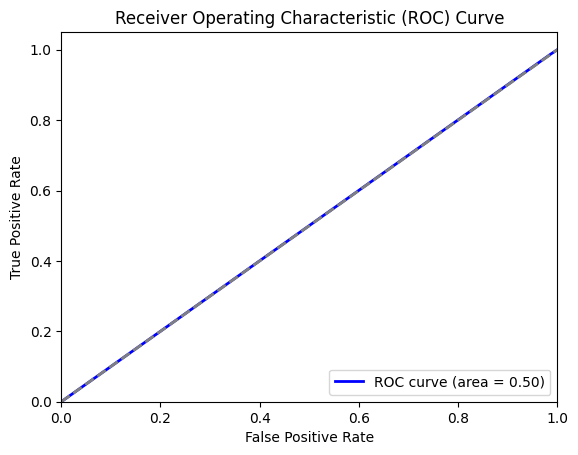

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# True labels
y_true = matrix_df["Equality"]

# Predicted scores
y_scores = matrix_df["prediction"]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()